In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
from scipy import stats

In [ ]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

## Задача 1

О непрерывной равномерно распределенной случайной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

## Задача 2

Рост взрослого населения города X имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (numpy, scipy, pandas и пр.), а затем проверить себя с помощью встроенных функций

In [12]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

In [9]:
loc=174
scale=8

In [10]:
samples = np.random.normal(loc, scale, size=10000)

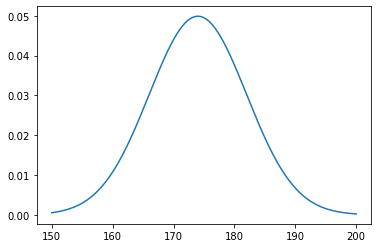

In [17]:
ox = np.linspace(150, 200, 10000)
oy = np.array([pdf_normal(loc,scale, x) for x in ox])

plt.plot(ox, oy)

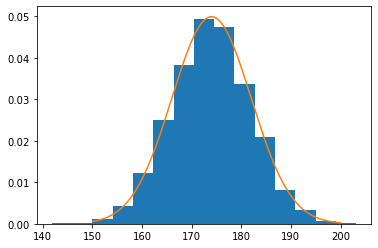

In [18]:
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

In [20]:

def edf(samples, x):
    return samples[samples < x].shape[0] / samples.shape[0]

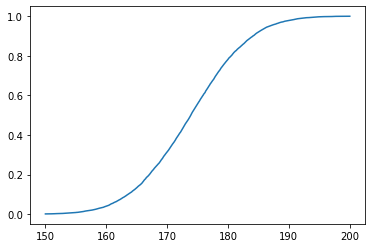

In [21]:
ox = np.linspace(150, 200, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy)

In [23]:
# Вероятность больше 182
p1=1-edf(samples, 182)
p1

0.15459999999999996

In [24]:
# Вероятность больше 190
p2=1-edf(samples, 190)
p2

0.021399999999999975

In [25]:
# Вероятность от 166 до 190
p3=edf(samples, 190)-edf(samples, 166)
p3

0.8160000000000001

In [26]:
# Вероятность от 166 до 182
p4=edf(samples, 182)-edf(samples, 166)
p4

0.6828000000000001

In [27]:
# Вероятность от 166 до 190
p5=edf(samples, 190)-edf(samples, 158)
p5

0.9560000000000001

In [29]:
# Вероятность не в 150 до 190
p6=1 - (edf(samples, 190)-edf(samples, 150))
p6

0.02279999999999993

In [30]:
# Вероятность не в 150 до 198
p7=1 - (edf(samples, 198)-edf(samples, 150))
p7

0.0021999999999999797

In [31]:
# Вероятность ниже 166
p8=edf(samples, 166)
p8

0.1626

## Задача 3 (Дополнительно)

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [57]:
scale=0.05
while True:
    f_konf = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    if f_konf <= 0.05:
        break
    else:
        scale = scale-0.00001
print(scale)

0.03646999999999586


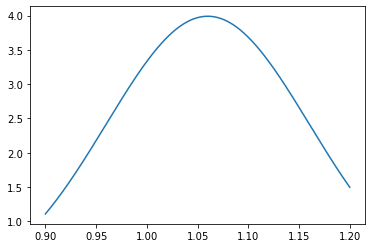

In [58]:
stats.norm.cdf(x=1, loc=1.06, scale=0.03646)

0.04991904653266592